# A Walk-through of RiboPy API


**Contents:**

* [Introduction](#introduction)
  - [Transcript Regions](#transcript-regions)
* [Installation](#installation)
  - [pip](#pip)
  - [Conda](#conda)
  - [From the Source Code](#from-the-source-code)
* [Getting Started](#getting-started)
  - [Generating a Ribo Object](#generating-a-ribo-object)
* [Length Distribution](#length-distribution)
* [Metagene Analysis](#metagene-analysis)
  - [A Note on Aggregating the Output](#a-note-on-aggregating-the-output)
* [Region Counts](#region-counts)
* [Advanced Features](#advanced-features)
   - [Alias](#alias)
   - [Object Attributes](#object-attributes)
* [Optional Data](#optional-data)
   - [Metadata](#metadata)
   - [Coverage](#coverage)
   - [RNA-Seq](#rna-seq)

## Introduction<a name="introduction"></a>

[Ribosome Profiling](https://www.nature.com/articles/nrg3645) is a sequencing based method to study protein synthesis transcriptome-wide. Actively translating mRNAs are engaged with ribosomes and protein synthesis rates can be approximated by the number of ribosomes that are translating a given mRNA. Ribosome profiling employs an RNase digestion step to recover fragments of RNA protected by ribosomes which are called **Ribosome Protected Footprints (RPFs)**.

Ribosome profiling data analyses involve several quantifications for each transcript. Specifically, the lengths of the RPFs provide valuable biological information (see, for example, [Lareau et al.](https://elifesciences.org/articles/01257) and [Wu et al.](https://www.sciencedirect.com/science/article/pii/S1097276518310633?via%3Dihub)). To facilitate ribosome profiling data analyses as a function of RPF length in a highly efficient manner, we implemented a new data format, called [ribo](https://ribopy.readthedocs.io/en/latest/ribo_file_format.html). Files in ribo format are called **.ribo** files.

RiboPy package is an Python interface for .ribo files. The package offers a suite of reading functions for .ribo files, and provides plotting functions that are most often employed in ribosome profiling analyses. Using RiboPy, one can import .ribo files into the Python environment, read ribosome profiling data into pandas data frames and generate essential plots in a few lines of Python code.

This document is structured into several sections. First, we give an overview of the Ribo File format and define transcript regions. Second, we provide instructions and requirements for the installation of RiboPy. Third, we describe how to import a .ribo file to the Python environment and demonstrate essential ribosome profiling data analyses in three sections:

* [Length Distribution](#length-distribution)
* [Metagene Analysis](#metagene-analysis)
* [Region Counts](#region-counts)

In the last two sections, we describe some advanced features including renaming transcripts using aliases, accessing .ribo file attributes, and getting region boundaries that define transcript regions.
In the last section, we explain the three optional types of data, which may exist in a .ribo file.

* Metadata: A .ribo file may contain metadata for each experiment and for the .ribo file itself.
* Coverage: A .ribo file can keep the nucleotide level transcriptome coverage.
* RNA-Seq: A ribosome profiling experiment can be paired with an RNA-Seq experiment to study ribosome occupancy together with transcript abundance.


###  .ribo File Format <a name="riboformat"></a>



.ribo files are built on an [HDF5](https://www.hdfgroup.org/solutions/hdf5/) architecture and has a predefined internal structure (Figure 1). For a more detailed explanation of the ribo format, we refer to the 
[readthedocs page of ribo](https://ribopy.readthedocs.io/en/latest/ribo_file_format.html).

![Figure 1 ribo File Internal Structure](https://ribopy.readthedocs.io/en/latest/_images/ribo_file_structure.jpg "Figure 1 ribo File Internal Structure")
<center>Figure 1: ribo File Internal Structure<br></center>

While many features are required in .ribo files, quantification from paired RNA-Seq data and nucleotide-level coverage are optional.

### Transcript Regions<a name="transcript-regions"></a>

The main protein coding region of a transcript is called the coding sequence (CDS). Its boundaries are called transcription start / stop sites. The region consisting of the nucleotides, between the 5’ end of the transcript and the start site, not translated to protein, is called 5’ untranslated region (5’UTR). Similarly, the region having the nucleotides between the stop site and the 3’ end of the transcript, is called 3’ untranslated region (3’UTR). To avoid strings and variable names starting with a number and containing an apostrophe character, we use the names UTR5 and UTR3 instead of 5’UTR and 3’UTR respectively.

## Installation <a name="installation"></a>

RiboPy requires Python version 3.6 or higher.

### Availability<a name="availability"></a>

The source code of RiboPy package is available in a [public Github repository](https://github.com/ribosomeprofiling/ribopy).

### Pip<a name="pip"></a>

RiboPy can be install via pip:

``` 
   pip install ribopy
```

### Conda<a name="conda"></a>


It is recommended to install RiboPy in a separate conda environment. For this, install conda first by following the instructions [here](https://conda.io/projects/conda/en/latest/user-guide/install/index.html).

The following commands will download an environment file, called enviroenment.yaml, and install RiboPy inside a conda environmen named *ribo*. 

```
wget https://github.com/ribosomeprofiling/riboflow/blob/master/environment.yaml
conda env create -f environment.yml
```

###  From the Source Code<a name="from-the-source-code"></a>

```
   pip install git+https://github.com/ribosomeprofiling/ribopy.git
```

In [1]:
# Some formatting forthe rest of the notebook
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Getting Started<a name="getting-started"></a>

First, we download a sample ribo file.

In [2]:
! wget https://github.com/ribosomeprofiling/ribo_manuscript_supplemental/raw/master/sidrauski_et_al/ribo/without_coverage/all.ribo

--2019-12-19 13:20:57--  https://github.com/ribosomeprofiling/ribo_manuscript_supplemental/raw/master/sidrauski_et_al/ribo/without_coverage/all.ribo
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ribosomeprofiling/ribo_manuscript_supplemental/master/sidrauski_et_al/ribo/without_coverage/all.ribo [following]
--2019-12-19 13:20:58--  https://raw.githubusercontent.com/ribosomeprofiling/ribo_manuscript_supplemental/master/sidrauski_et_al/ribo/without_coverage/all.ribo
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44518345 (42M) [application/octet-stream]
Saving to: ‘all.ribo.9’

all.ribo.9          100%[===================>]  42.46M  94

Next, we import the ribopy package

In [3]:
import ribopy
%matplotlib inline

### Generating a Ribo Object <a name="generating-a-ribo-object"></a>

To interact with a .ribo file, it is necessary to create a ribo object that provides a direct handle to the file and displays its various attributes. As an example, we processed publicly available ribosome profiling data (GEO accession number [GSE65778](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE65778)) from HEK293 cells using [RiboFlow](https://github.com/ribosomeprofiling/riboflow) pipeline to generate the .ribo file in this document. More precisely, we picked two ribosome profiling experiments coming from untreated HEK293 cells (accession numbers: GSM1606107 and GSM1606108) and two RNA-Seq experiments coming from the same line of untreated cells (accession numbers: GSM1606099 and GSM1606100). Each ribo experiment can be paired with a single RNA-Seq experiment. So we arbitrarily paired the ribosome profiling experiment GSM1606107 with RNA-Seq experiment GSM1606099 and GSM1606108 with GSM1606100, when making the example .ribo file in this document.

In [4]:
# Import the Ribo Object from the RiboPy package
from ribopy import Ribo

ribo_path   = "all.ribo"
ribo_object = Ribo(ribo_path, alias = ribopy.api.alias.apris_human_alias)

Once the ribo object is created, we can inquire about the contents of the .ribo file by calling the `print_info` method.

In [5]:
ribo_object.print_info()

Ribo File Info:
---------------
Ribo File Version : 1.0
RiboPy Version    : 0.0.0
Creation Time     : 2019-11-03 13:31:16
Reference         : appris-v1
Min Read Length   : 15
Max Read Length   : 40
Metagene Radius   : 50
Left Span         : 35
Right Span        : 10

Experiments:
------------ 
Name          Reads  Coverage  RNA-Seq  Metadata
GSM1606107  7243990         *        *         *
GSM1606108  8175863         *        *         *


The above output provides information about the individual experiments that are contained in the given ribo object. In addition, this output displays some of the parameters, that were used in generating the .ribo file, such as left span, right span and metagene radius.

For a detailed explanation of the contents of this output, we refer to the 
[online documentation of the ribo format](https://ribopy.readthedocs.io/en/latest/ribo_file_format.html).

In what follows, we demonstrate a typical exploration of ribosome profiling data. We start with the length distribution of RPFs.


## Length Distribution <a name="length-distribution"></a>

Several experimental decisions including the choice of RNase can have a significant impact on the RPF length distribution. In addition, this information is generally informative about the quality of the ribosome profiling data.

We use the method `plot_lengthdist` to generate the distribution of the reads mapping to a specific region. This method has also a boolean argument called `normalize`. When normalize is False, the y-axis displays the total number of reads mapping to the specified region. When fraction is True, the y-axis displays the quotient of the same number as above divided by the total number of reads reported in the experiment.

The following code plots the coding region mapping RPF length distribution.

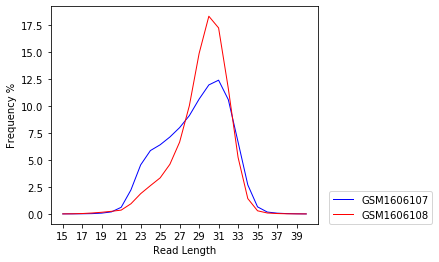

In [6]:
ribo_object.plot_lengthdist(region_type = "CDS",
                            normalize   = True,
                            experiments = ["GSM1606107", "GSM1606108"])

We can also plot the absolute number of reads instead of the fraction of total reads by changing the argument `normalize = False`.

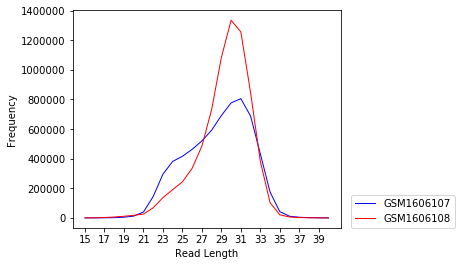

In [7]:
ribo_object.plot_lengthdist(region_type = "CDS",
                            normalize   = False,
                            experiments = ["GSM1606107", "GSM1606108"])

We can extract the numerical values used to produce the above plot using the method `get_length_dist` as follows. The parameters of this method will be explained in more detail later in this document.

In [8]:
ribo_object.get_length_dist(region_name = "CDS",
                            experiments = ["GSM1606107", "GSM1606108"])

,GSM1606107,GSM1606108
read_length,,
15,356,375
16,591,975
17,1023,2742
18,1911,6232
19,4913,11228
20,12320,17668
21,39946,25851
22,144577,68636
23,295417,136887


## Metagene Analysis<a name="metagene-analysis"></a>

A common quality control step in ribosome profiling analyses is the inspection of the pileup of sequencing reads with respect to the start and stop site of annotated coding regions. Given that ribosomes are predominantly translating annotated coding regions, these plots are informative about the enrichment at the boundaries of coding regions and also provide information regarding the periodicity of aligned sequencing reads. This type of plot is called a metagene plot as the reads are aggregated around translation start and stop sites across all transcripts.

The parameter “metagene radius” is the number of nucleotides surrounding the start/stop site and hence defines the region of analysis. For each position, read counts are aggregated across transcripts. This cumulative read coverage (y-axis) is plotted as a function of the position relative to the start/stop site (x-axis).

`metagene_radius` attribute of the ribo object gives us the metagene radius.

In [9]:
ribo_object.metagene_radius

50

We can plot the ribosome occupancy around the start or stop sites using plot_metagene. The following code produces the metagene plot at the start site for the experiments GSM1606107 and GSM1606108. The values on the y-axis are the raw read counts.

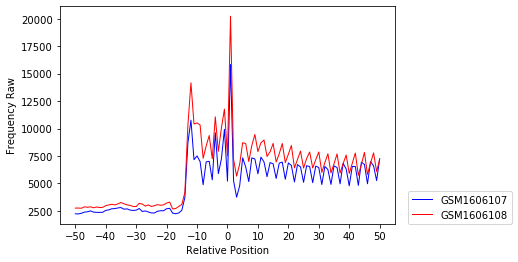

In [10]:
ribo_object.plot_metagene(site_type   = "start",
                          experiments = ["GSM1606107", "GSM1606108"],
                          range_lower = 15,
                          range_upper = 40)

To better compare these experiments, we can normalize the coverage by setting `normalize = True`. In the following example, in addition to these parameters, we set `site_type = "stop"` to see the stop site coverage.

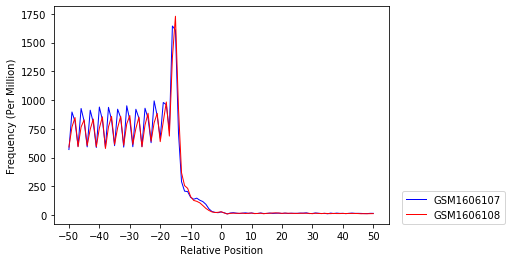

In [11]:
ribo_object.plot_metagene(site_type   = "stop",
                          experiments = ["GSM1606107", "GSM1606108"],
                          normalize   = True,
                          range_lower = 15,
                          range_upper = 40)

The method `get_metagene` can be used to read the metagene data into a [pandas data frame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). When using `sum_lengths = True` and `sum_references = True`, the user will obtain the most concise data corresponding to the sum of reads surrounding the start / stop site across all read lengths and transcripts. As a result, one row of values will be reported for each experiment.

In [12]:
metagene_start = \
   ribo_object.get_metagene(site_type      = "start",
                            range_lower    = 15,
                            range_upper    = 40,
                            sum_lengths    = True,
                            sum_references = True
                        )
# In the column indeces, 0 corresponds to the start site
# The entire dataframe is too wide. So we display 
# the 5 nucleotides to the right and the left of the
# start site.

metagene_start[range(-5,6)]

,-5,-4,-3,-2,-1,0,1,2,3,4,5
experiment,,,,,,,,,,,
GSM1606107,5326,9618,5889,7221,9928,5211,15829,5247,3747,4778,7330
GSM1606108,7250,11066,7925,10034,11769,7491,20228,7192,5662,6742,8715


To maintain the counts at each individual read length summed across transcripts, use `sum_lengths = True` and `sum_references = False`. If the metagene data of a single read length, say 30, is needed, set `range_lower` and `range_lower` to 30.

In [13]:
metagene_start_trans = \
   ribo_object.get_metagene(site_type      = "start",
                            range_lower    = 30,
                            range_upper    = 30,
                            sum_lengths    = True,
                            sum_references = False,
                            alias          = True
                           )
metagene_start_trans[range(-5,6)]

-5  -4  -3  -2  -1   0   1   2   3   4   5
experiment transcript                                             
GSM1606107 OR4F5-201     0   0   0   0   0   0   0   0   0   0   0
           OR4F29-201    0   0   0   0   0   0   0   0   0   0   0
           OR4F16-201    0   0   0   0   0   0   0   0   0   0   0
           SAMD11-202    0   0   0   0   0   0   0   0   0   0   0
           NOC2L-201     0   1   1   0   1   1   1   0   0   0   1
...                     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
GSM1606108 MT-CO2-201    0   0   0   0   0   0   1   0   0   1   0
           MT-ATP8-201   0   0   0   0   0   0   1   0   0   0   0
           MT-ATP6-201   0   0   0   0   0   0   0   0   0   0   0
           MT-ND4L-201   0   0   0   0   0   0   0   1   0   0   0
           MT-ND5-201    0   0   0   0   0   1   1   1   1   1   1

[39644 rows x 11 columns]

If we wish to preserve the read counts for individual transcript sum across a range of read lengths, we set `sum_references = False` and `sum_lengths = True`. While it is possible to set `sum_references = False` and `sum_lengths = False`, run times might be slower for this option, and running the method with these options requires a substantial amount of memory.

In [14]:
metagene_start_length = \
    ribo_object.get_metagene(site_type      = "start",
                            range_lower    = 15,
                            range_upper    = 40,
                            sum_lengths    = False,
                            sum_references = True,
                            alias          = True
                           )

# The entire dataframe gives metagene data for both experiments
# from the relative positions -50 to 50. 
# Here we restrict our attention to one experiment: GSM1606107
# and the positions -5 to 5 by slicing the data frame.
metagene_start_length.loc["GSM1606107"][range(-5,6)]

,-5,-4,-3,-2,-1,0,1,2,3,4,5
read_length,,,,,,,,,,,
15,0,0,0,0,0,0,1,0,0,2,1
16,1,0,0,1,0,0,1,0,1,1,0
17,0,2,0,3,1,0,6,0,0,3,1
18,2,3,1,1,0,3,16,3,4,5,1
19,0,4,0,4,17,12,42,4,4,8,12
20,3,6,6,43,55,32,105,11,10,30,22
21,16,28,66,206,89,50,375,16,20,55,32
22,61,228,295,484,209,181,710,84,42,99,127
23,259,460,409,484,327,259,926,155,63,154,236


### A Note on Aggregating the Output<a name="a-note-on-aggregating-the-output"></a>

In the above function calls, we used two parameters `sum_lengths` and `sum_references` which are used, in general, by reading and plotting functions in RiboPy. These parameters determine how data is aggregated.

More precisely:

* **sum_lengths**:
 - If `True`, the counts will be summed up across the given read length interval. Otherwise, if `sum_lengths` is `False`, the counts at each individual read length will be included separately in the output.
* **sum_references**:
 - If `True`, the counts will be summed up across all the transcripts. Otherwise, if `sum_references` is `False`, the counts at each individual transcript will be reported separately.

## Region Counts<a name="region-counts"></a>

Another important aspect of ribosome profiling data is the number of reads mapping to the different regions of the transcripts, namely, 5’UTR, CDS and 3’UTR. A large number of reads mapping to UTR5 or UTR3 regions might indicate a poor quality ribosome profiling data since ribosomes occupy CDS. Furthermore, the distribution of reads across these regions can be associated with the RNase choice in the experiment. For example in [Miettinen and Bjorklund](https://academic.oup.com/nar/article/43/2/1019/2414322), it was shown that ribosome profiling experiments are dependent on digestion conditions.

Before going into the Python methods, we briefly explain how region counts are computed, introduce our naming convention and define the regions used in ribo format.

For each read mapped to the transcriptome, we take the first nucleotide on the 5’ end of the read and determine the corresponding region. After doing this for all reads, the accumulated values give us the region counts.

As mentioned earlier, a messenger RNA transcript is partitioned into three regions: 5’UTR, CDS and 3’UTR. For technical reasons, we rename 5’UTR as UTR5 and 3’UTR as UTR3.

It is well-known that ribosomes pause, or move slower, around start and stop sites. As a result, we observe peaks around start and stop sites in metagene plots. This behavior of ribosome makes it harder to perform certain analyses such as coverage, translation efficiency, periodicity and uniformity analysis with accuracy. To tackle this problem, we introduce two additional regions called **UTR5 junction** and **UTR3 junction**, and modify the definition of the regions UTR5, CDS and UTR3 as shown in Figure 2. This way, we keep regions around start and stop sites separate when doing such analyses.

![Figure 2: Region Definitions](https://ribopy.readthedocs.io/en/latest/_images/region_definition.jpg "Region Definitions")
<center>
    Figure 2: Region Definitions
</center>

More precisely, first, we fix two integers: __left span__ (__l__) and
__right span__ (__r__) and define the __junction__ regions as follows.

* __UTR5 junction:__ This region consists of __l__ nucleotides to the left of the **start** site
   , and __r__ nucleotides to the right of the **start** site.
   
* __UTR3 junction:__ This region consists of __l__ nucleotides to the left of the **stop** site
   , and __r__ nucleotides to the right of the **stop** site.
   
Using these junction regions, we re-define the conventional regions as follows.   
   
* __UTR5__: This region is the set of nucleotides between the 5' end of the transcript and the UTR5 junction.

* __CDS__:  This region is the set of nucleotides between the UTR5 junction and UTR3 junction.

* __UTR3__: This region is the set of nucleotides between the UTR3 junction and the 3' end of the transcript.

Similar to the `get_metagene` method, the `get_region_counts` method has the `sum_references` and `sum_lengths` parameters. As previously mentioned, `sum_references` specifies whether or not to sum across the transcripts, and `sum_lengths` specifies whether or not to sum across the read lengths. 


The following code will plot the number of sequencing reads whose 5’ ends map to the UTR5, CDS, and UTR3 as a stacked bar plot. To facilitate comparison between experiments, the percentage of the regions counts are plotted and the percentage of reads mapping to CDS are printed on the plot.

<Figure size 432x288 with 0 Axes>

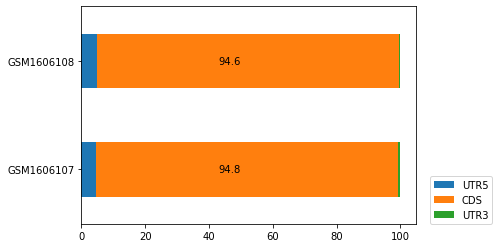

In [15]:
ribo_object.plot_region_counts(experiments = ["GSM1606107", "GSM1606108"],
                               range_lower = 15,
                               range_upper = 40,
                               horizontal  = True)

To get the region counts, for example for the coding sequence, summed across both lengths and transcripts, set `region_name = "CDS"`, `sum_lengths = True` and `sum_references = True`.

In [16]:
ribo_object.get_region_counts(experiments    = ["GSM1606107", "GSM1606108"],
                              region_name    = "CDS",
                              range_lower    = 15,
                              range_upper    = 40,
                              sum_lengths    = True,
                              sum_references = True)

,GSM1606107,GSM1606108
0,6507079,7297244


When presented with the option of preserving the region counts at each individual read length, it may be preferable to present the transcript names as their shortened aliases.

To get the data only summed across the read lengths, set `sum_lengths = True` and `sum_references = False`. Note that the alias = TRUE in this case, and instead of original.ribo, we are using alias.ribo.

In [17]:
ribo_object.get_region_counts(experiments    = ["GSM1606107", "GSM1606108"],
                              region_name    = "CDS",
                              range_lower    = 15,
                              range_upper    = 40,
                              sum_lengths    = True,
                              sum_references = False,
                              alias          = True)

,GSM1606107,GSM1606108
transcript,,
OR4F5-201,0,0
OR4F29-201,0,0
OR4F16-201,0,0
SAMD11-202,428,553
NOC2L-201,3175,3598
...,...,...
MT-CO2-201,757,1171
MT-ATP8-201,218,288
MT-ATP6-201,869,1360


To get the data in its full form, preserving the information each individual read length and transcript, set `sum_lengths = False` and `sum_references = False`.

In [18]:
ribo_object.get_region_counts(experiments    = ["GSM1606107", "GSM1606108"],
                              region_name    = "CDS",
                              range_lower    = 15,
                              range_upper    = 40,
                              sum_lengths    = False,
                              sum_references = False,
                              alias          = True)

,,GSM1606107,GSM1606108
transcript,read_length,,
OR4F5-201,15,0,0
OR4F29-201,15,0,0
OR4F16-201,15,0,0
SAMD11-202,15,0,0
NOC2L-201,15,0,0
...,...,...,...
MT-CO2-201,40,1,0
MT-ATP8-201,40,0,0
MT-ATP6-201,40,0,1


## Advanced Features <a name="advanced-features"></a>

### Alias <a name="alias"></a>

In the beginning, when we created the ribo object, we used an optional parameter 
`alias = ribopy.api.alias.apris_human_alias`.

In [19]:
ribo_object = Ribo(ribo_path, alias = ribopy.api.alias.apris_human_alias)

The transcriptome reference, that we used to generate this .ribo file, is from [GENCODE](https://www.gencodegenes.org/). In particular, transcript names in this reference are long for the sake of completeness. For example, they include Ensemble transcript and gene ids in addition to standard gene symbols (HGNC).

In [20]:
ribo_object.transcript_names[:2]

array(['ENST00000335137.4|ENSG00000186092.6|OTTHUMG00000001094.4|-|OR4F5-201|OR4F5|1054|protein_coding|',
       'ENST00000426406.3|ENSG00000284733.1|OTTHUMG00000002860.3|OTTHUMT00000007999.3|OR4F29-201|OR4F29|995|protein_coding|'],
      dtype='<U144')

A user might want to work with simplified ids for convenience. To provide this functionality, an optional parameter called `alias` can be provided when initializing a ribo object as shown above.

The default renaming function extracts the fifth entry in the transcript name, separated by “|”.

In [21]:
def apris_human_alias(x):
    return x.split("|")[4]

apris_human_alias("ENST00000335137.4|ENSG00000186092.6|OTTHUMG00000001094.4|-|OR4F5-201|OR4F5|1054|protein_coding|")

'OR4F5-201'

The renaming can be changed by defining an appropriate method for alias. For example, we can use encode gene id together with the transcript name.

In [22]:
def defalternative_human_alias(x):
    x_pieces = x.split("|")
    return x_pieces[1] + "_" + x_pieces[4]

ribo_object = ribo_object = Ribo(ribo_path, alias = defalternative_human_alias)
ribo_object.get_region_counts(experiments    = ["GSM1606107", "GSM1606108"],
                              region_name    = "CDS",
                              range_lower    = 15,
                              range_upper    = 40,
                              sum_lengths    = True,
                              sum_references = False,
                              alias          = True)

,GSM1606107,GSM1606108
transcript,,
ENSG00000186092.6_OR4F5-201,0,0
ENSG00000284733.1_OR4F29-201,0,0
ENSG00000284662.1_OR4F16-201,0,0
ENSG00000187634.11_SAMD11-202,428,553
ENSG00000188976.10_NOC2L-201,3175,3598
...,...,...
ENSG00000198712.1_MT-CO2-201,757,1171
ENSG00000228253.1_MT-ATP8-201,218,288
ENSG00000198899.2_MT-ATP6-201,869,1360


### Object Attributes <a name="object-attributes"></a>

If we want a returned list of previously printed attributes, of a ribo object, then the attribute `info` will return all of the attributes found in the root of the .ribo file as well as information on each of the experiments. For a detailed explanation, see the [readthedocs page of RiboPy](https://ribopy.readthedocs.io/en/latest/index.html).

Note that this simply returns a named list of many of the ribo object contents. The returned list organizes the information into three separate values, has.metadata, attributes, and experiment.info. This is a more efficient alternative to simply referencing the values in the ribo object since the method reads directly from the .ribo file handle and not the downstream declared ribo object.


In [23]:
ribo_object.info

OrderedDict([('Ribo File Version', '1.0'),
             ('RiboPy Version', '0.0.0'),
             ('Creation Time', '2019-11-03 13:31:16'),
             ('Reference', 'appris-v1'),
             ('Min Read Length', 15),
             ('Max Read Length', 40),
             ('Metagene Radius', 50),
             ('Left Span', 35),
             ('Right Span', 10),
             ('experiments',
              {'GSM1606107': {'Reads': 7243990,
                'Coverage': True,
                'RNA-Seq': True,
                'Metadata': {'3padapter': 'CTGTAGGCACCATCAAT',
                 'GEO': 'GSM1606107',
                 'Lab': 'Ingolia',
                 'Notes': 'One nuc. clipped from fivep',
                 'SRA': 'SRR1795425,SRR1795426',
                 'cell-line': 'HEK 293',
                 'link': 'https://elifesciences.org/articles/05033'}},
               'GSM1606108': {'Reads': 8175863,
                'Coverage': True,
                'RNA-Seq': True,
                'Metadata':

## Optional Data <a name="optional-data"></a>

Length distribution, metagene coverage and region counts are essential to ribosome profiling data analysis and these data exist in every .ribo file. However, for certain types of analysis, additional data might be required. For example, periodicity and uniformity analyses require the knowledge of number of reads at each nucleotide position, aka coverage data. Another analysis, called translation efficiency, can be done when transcript abundance information is present. For these types of analyses, .ribo files offer two types of optional data: coverage data and RNA-Seq data.

It might be helpful to have data explaining how ribosome profiling data is collected, prepared and processed. For this, .ribo files has an additional field, called metadata, to store such data for each experiment and for the .ribo file itself.

Optional data don’t necessarily exist in every .ribo file. Their existence can be checked as follows.

In [24]:
ribo_object.print_info()

Ribo File Info:
---------------
Ribo File Version : 1.0
RiboPy Version    : 0.0.0
Creation Time     : 2019-11-03 13:31:16
Reference         : appris-v1
Min Read Length   : 15
Max Read Length   : 40
Metagene Radius   : 50
Left Span         : 35
Right Span        : 10

Experiments:
------------ 
Name          Reads  Coverage  RNA-Seq  Metadata
GSM1606107  7243990         *        *         *
GSM1606108  8175863         *        *         *


In the above output, we see that both of the experiments have all optional data as the values in the columns ‘Coverage’, ‘RNA-Seq’ and ‘Metadata’ are "\*". An absence of "\*" would indicate indicate the absence of the corresponding data.

### Metadata <a name="metadata"></a>

A .ribo file can contain metadata for each individual experiment as well as the ribo file itself. If we want to see the metadata of a given experiment, then we can use the `get_metadata` method and specify the experiment of interest.

To view the metadata of the .ribo file, we use the `get_metadata` method without any arguments.

In [25]:
ribo_object.get_metadata()

{'alignment_arguments': {'filter': '-L 15 --no-unal --norc',
  'genome': '--no-unal -k 1',
  'transcriptome': '-L 15 --norc --no-unal'},
 'clip_arguments': '-u 1 -a CTGTAGGCACCATCAAT --overlap=4 --trimmed-only --maximum-length=40 --minimum-length=15 --quality-cutoff=28',
 'deduplicate': True,
 'do_check_file_existence': True,
 'do_fastqc': True,
 'do_metadata': True,
 'do_rnaseq': True,
 'input': {'fastq': {'GSM1606107': ['GSM1606107/SRR1795425.fastq.gz',
    'GSM1606107/SRR1795426.fastq.gz'],
   'GSM1606108': ['GSM1606108/SRR1795427.fastq.gz',
    'GSM1606108/SRR1795428.fastq.gz']},
  'fastq_base': './fastq/ribosome_profiling',
  'metadata': {'base': './metadata',
   'files': {'GSM1606107': 'GSM1606107.yml', 'GSM1606108': 'GSM1606108.yml'}},
  'reference': {'filter': './rf_sample_data/filter/human_rtRNA*',
   'regions': './rf_sample_data/annotation/appris_human_24_01_2019_actual_regions.bed',
   'transcript_lengths': './rf_sample_data/annotation/appris_human_24_01_2019_selected.length

To retrieve metadata from one of the experiments, we provide the parameter `experiment`. Note that metadata is of the type dictionary.

In [26]:
ribo_object.get_metadata(experiment = "GSM1606107")

{'3padapter': 'CTGTAGGCACCATCAAT',
 'GEO': 'GSM1606107',
 'Lab': 'Ingolia',
 'Notes': 'One nuc. clipped from fivep',
 'SRA': 'SRR1795425,SRR1795426',
 'cell-line': 'HEK 293',
 'link': 'https://elifesciences.org/articles/05033'}

### Coverage <a name="coverage"></a>

For all quantifications, we first map the sequencing reads to the transcriptome and use the 5’ most nucleotide of each mapped read. Coverage data is the total number of reads whose 5’ends map to each nucleotide position in the transcriptome.

Within a .ribo file, the coverage data, if exists, is typically the largest data set in terms of storage, and it accounts for a substantial portion of a .ribo file’s size, when present. The get_coverage function returns the coverage information for one specific transcript at a time.

Since coverage data is an optional field of .ribo files, it is helpful to keep track of the experiment names with coverage data. Once the list is obtained, the experiments of interest can easily be chosen and extracted.

In the example below, we read the entire coverage data into a dictionary. Then we access the coverage data of the transcript labeled as 'ENSG00000197568.13_HHLA3-202'. The coverage data coming from lengths, from 28 to 32 are summed up in the resulting array.

In [27]:
coverage_data = ribo_object.get_coverage(experiment  = "GSM1606107", 
                                         alias       = True,
                                         range_lower = 28,
                                         range_upper = 32)
coverage_data["ENSG00000197568.13_HHLA3-202"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

### RNA-Seq <a name="rna-seq"></a>

Most ribosome profiling experiments generate matched RNA-Seq data to enable analyses of translation efficiency. We provide the ability to store RNA-Seq quantification in .ribo files to facilitate these analyses. We store RNA-seq quantifications in a manner that parallel the region counts for the ribosome profiling experiment. Specifically, the RNA-Seq data sets contain information on the relative abundance of each transcript at each of the following transcript regions.

  * 5’ Untranslated Region (UTR5)
  * 5’ Untranslated Region Junction (UTR5_junction)
  * Coding Sequence (CDS)
  * 3’ Untranslated Region Junction (UTR3_junction)
  * 3’ Untranslated Region (UTR3)

In [28]:
# Take RNA-Seq data only for the experiment GSM1606107
rnaseq_data = ribo_object.get_rnaseq().loc["GSM1606107"]

# Let's rename the transcript names to their shorter form manually
rnaseq_data.index = \
    list(map(apris_human_alias, 
            ribo_object.transcript_names.tolist() ) ) 
rnaseq_data

,UTR5,UTR5_junction,CDS,UTR3_junction,UTR3
OR4F5-201,0.0,0.0,0.0,0.0,0.0
OR4F29-201,0.0,0.0,0.0,0.0,0.0
OR4F16-201,0.0,0.0,0.0,0.0,0.0
SAMD11-202,0.0,15.0,819.0,30.0,23.0
NOC2L-201,0.0,2.0,4054.0,66.0,180.0
...,...,...,...,...,...
MT-CO2-201,0.0,30.0,7018.0,2.0,0.0
MT-ATP8-201,0.0,3.0,241.0,0.0,0.0
MT-ATP6-201,0.0,20.0,3992.0,5.0,0.0
MT-ND4L-201,0.0,12.0,815.0,0.0,0.0


Using the resulting data frame, one get the CDS counts for the experiment `GSM1606108`.

In [29]:
rnaseq_data["CDS"]

OR4F5-201         0.0
OR4F29-201        0.0
OR4F16-201        0.0
SAMD11-202      819.0
NOC2L-201      4054.0
                ...  
MT-CO2-201     7018.0
MT-ATP8-201     241.0
MT-ATP6-201    3992.0
MT-ND4L-201     815.0
MT-ND5-201     5423.0
Name: CDS, Length: 19822, dtype: float32